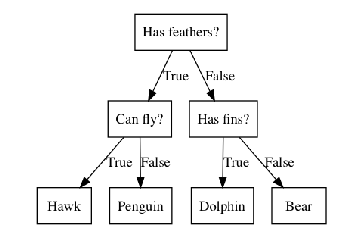

In [2]:
import mglearn
mglearn.plots.plot_animal_tree()

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# とりあえず、タイブレーク時に使うrandom stateは0にする
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy training: {tree.score(X_train, y_train)}")
print(f"Accuracy test: {tree.score(X_test, y_test)}")


Accuracy training: 1.0
Accuracy test: 0.9370629370629371


Accuracy training: 0.9882629107981221
Accuracy test: 0.951048951048951


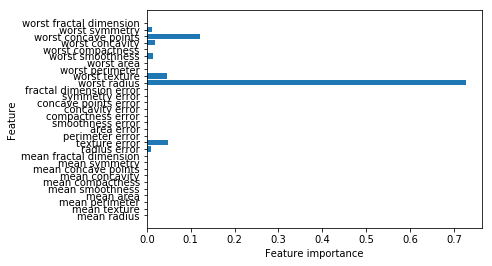

In [22]:
# 枝刈りをしない場合には、木がいくらでも複雑になり過剰適合になりやすい。
# そのため、treeの深さを制限する
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import numpy as np

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy training: {tree.score(X_train, y_train)}")
print(f"Accuracy test: {tree.score(X_test, y_test)}")

export_graphviz(tree, out_file="tree.dot", class_names=["malignat", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

def plot_feature_importance(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

# feature_importanceを出してみることで、どの特徴量が大きく影響を与えているかがわかる。
# ただし、それが値がどのようになっていれば良いかはわからない
plot_feature_importance(tree)

Feature importances: [0. 1.]


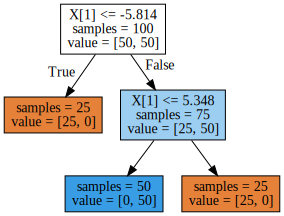

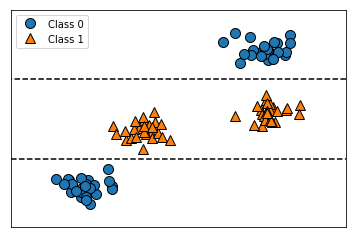

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import mglearn

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)


In [24]:
import os
import pandas as pd
from matplotlib import pyplot as plt

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_prices.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

FileNotFoundError: File b'/Users/takaaki-suzuki/.pyenv/versions/3.6.5/envs/sklearn-test/lib/python3.6/site-packages/mglearn/data/ram_prices.csv' does not exist